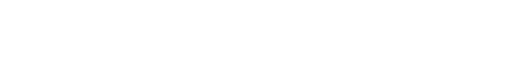

Using the dataset provided coutesy of FAO, the following questions were answered

- Total number of unique countries
- Mean and Standard deviation for the year 2017
- Areas with the highest sum in 2017
- The total number of wine produced in 2015 and 2018
- Missing values in the 2014 column and the percentage of the missing values in 2014 to the percentage of the total missing values in the entire dataset
- Total protein supply in Madagascar in 2015
- Sum of elements in 2017
- Year with the highest stock variation
- Year with the least correlation with Element Code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/FoodBalanceSheets_E_Africa_NOFLAG.csv'

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(path, encoding = 'latin-1')
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [7]:
data.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')

In [8]:
data.shape

(60943, 12)

In [8]:
# Total number of unique countries
data['Area'].nunique()

49

In [9]:
# mean and SD for 2017
mean_17 = data['Y2017'].mean()
mean_17

sd_17 = data['Y2017'].std()
sd_17

print (f'The mean of values across dataset for 2017 is {mean_17}')
print (f'The Standard deviation of values across dataset for 2017 is {sd_17}')

The mean of values across dataset for 2017 is 140.9177648602722
The Standard deviation of values across dataset for 2017 is 1671.8623590567995


In [11]:
data1 = data[['Y2017','Area']]
data1.head()

,Y2017,Area
0,41389.00,Algeria
1,0.00,Algeria
2,3341.00,Algeria
3,92.82,Algeria
4,80.19,Algeria


In [15]:
# Areas with the highest sum in 2017
area = data1.groupby('Area')['Y2017'].sum()
sort1 = area.sort_values(ascending = False)
sort1.head()

Area
Nigeria         1483268.23
Egypt            866379.92
South Africa     517590.54
Ethiopia         448683.76
Morocco          388495.36
Name: Y2017, dtype: float64

In [19]:
# Total number of wine produced in 2015 and 2018

wine_15 = data[data['Item'] == 'Wine']['Y2015'].sum()
wine_15
wine_18 = data[data['Item']=='Wine']['Y2018'].sum()
wine_18
print (f'The number of wine produced in 2015 is {wine_15}')
print(f'The number of wine produced in 2018 is {wine_18}')

The number of wine produced in 2015 is 4251.8099999999995
The number of wine produced in 2018 is 4039.3199999999997


In [27]:
# missing values in 2014
m_14 = data['Y2014'].isna().sum()
print(f'The sum of missing values in 2014 is {m_14}')

total_values = len(data)
percent_m = (m_14/total_values) * 100
print(f'The percentage of missing values is {percent_m}%')

The sum of missing values in 2014 is 1589
The percentage of missing values is 2.6073544131401474%


In [21]:
# total protein supply in madagascar in 2015
protein_supply = ['Bovine Meat','Mutton & Goat Meat','Pigmeat','Poultry Meat']
# others might include [,'Milk - Excluding Butter','Fish, Seafood','Freshwater Fish',
                 # 'Demersal Fish','Pelagic Fish','Marine Fish, Other',,'Eggs','Meat']
protein_data = data[data['Item'].isin(protein_supply)]
protein_sum = protein_data.groupby('Area')['Y2015'].sum().reset_index()
protein_sum_mdg = protein_sum[protein_sum['Area']=='Madagascar']
protein_sum_mdg


,Area,Y2015
23,Madagascar,1079.8


In [9]:
# Sum of elements in 2017
element_sum = data.groupby('Element')['Y2017'].sum().reset_index()
element_sum
total_sum = element_sum['Y2017'].sum()
print(f'The sum of elements in 2017 is {total_sum}')

The sum of elements in 2017 is 8375729.1899999995


In [16]:
# year with the highest stock variation


In [25]:
# Area with the 7th lowest sum in 2017
data1 = data[['Y2017','Area']]
data1
lowest_sum = data1.groupby('Area')['Y2017'].sum().reset_index()
sort2 = lowest_sum.sort_values(by = 'Y2017',ascending = True)
sort2.head(7)
low_s = sort2[sort2['Area']=='Guinea-Bissau']
print(f'The area with the 7th lowest sum in 2017 is {low_s}')

The area with the 7th lowest sum in 2017 is              Area     Y2017
21  Guinea-Bissau  19102.77


In [28]:
#

corr1 = data['Element Code'].corr(data['Y2017'])
corr2 = data['Element Code'].corr(data['Y2015'])
corr3 = data['Element Code'].corr(data['Y2016'])
corr4 = data['Element Code'].corr(data['Y2014'])

print('corr1:', corr1)
print('corr2:', corr2)
print('corr3:', corr3)
print('corr4:', corr4)
print(f'The year with the least correlation with element code is 2017')

corr1: 0.02425400776004575
corr2: 0.023889199301639956
corr3: 0.023443997584961424
corr4: 0.024456819495221754
The year with the least correlation with element code is 2017
